In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib
matplotlib.style.use('ggplot')

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sitka.engine.settings import *
from sitka.engine.time import *
from sitka.engine.weather import *
from sitka.components.site import *
from sitka.engine.calculations.solar_geometry import *
from sitka.engine.calculations.radiation import *

In [3]:
dir_path = os.getcwd()
path = os.path.join(dir_path, 'weather_data')
filename = 'USA_WA_Seattle-Boeing.Field.727935_TMY3.epw'
print(os.path.join(path, filename))

/Users/jamesmcneill/Documents/GitHub/sitka/weather_data/USA_WA_Seattle-Boeing.Field.727935_TMY3.epw


In [4]:
start_hour = 0
end_hour = 8760
time_steps_per_hour = 4

In [5]:
# Simulation run parameters
settings = Settings(dir_path)

time = Time(start_hour=start_hour, end_hour=end_hour, time_steps_per_hour=time_steps_per_hour)

weather = WeatherFile(settings, time, filename)
print(weather.location)

# Setup site
site = Site(weather.latitude, weather.longitude, weather.elevation)
print(site.latitude)
print(site.longitude)

# Solar angles
solar_angles = SolarAngles(time, site)

Updating time object
Importing weather data.
file imported.
Resampling weather data.
Seattle Boeing Field  Isis
47.68
-122.25
Updating solar angles


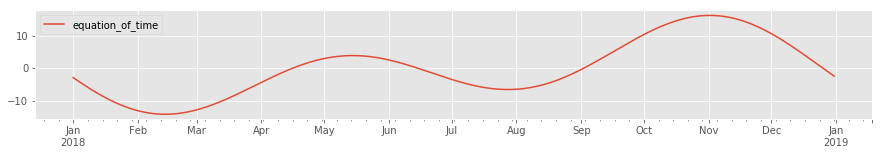

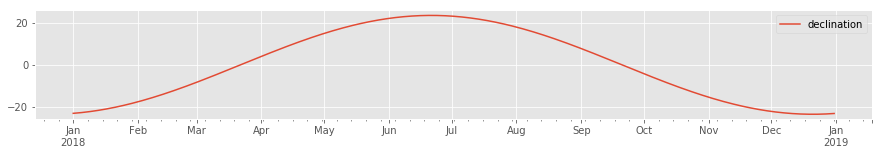

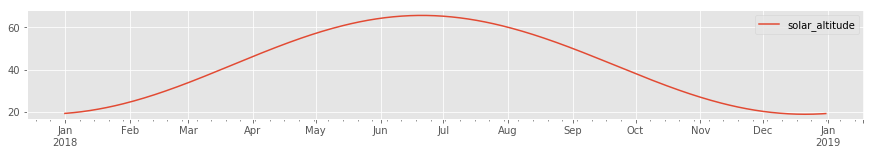

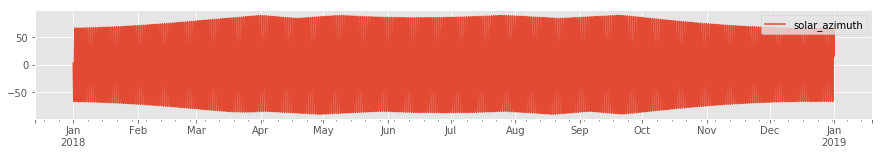

In [6]:
# Check solar angles
pd.DataFrame({'equation_of_time': solar_angles.get_time_series('equation_of_time').resample('1D').max()}).plot(figsize=[15,2])

pd.DataFrame({'declination': solar_angles.get_time_series('declination').resample('1D').max()}).plot(figsize=[15,2])

pd.DataFrame({'solar_altitude': solar_angles.get_time_series('solar_altitude').resample('1D').max()}).plot(figsize=[15,2])

pd.DataFrame({'solar_azimuth': solar_angles.get_time_series('solar_azimuth').resample('1H').mean()}).plot(figsize=[15,2])

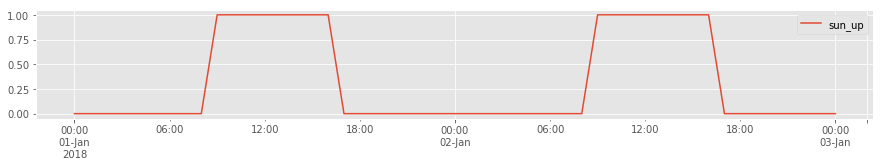

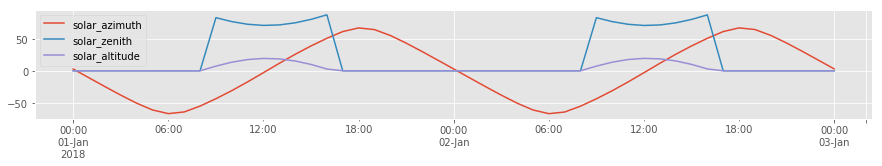

In [7]:
# Compare sunrise/sunset angles and incident direct radiation for two surfaces

start_time = '2018-01-01 00:00:00'
end_time = '2018-01-03 00:00:00'

pd.DataFrame({
    'sun_up': solar_angles.get_time_series('sun_up'),
})[start_time:end_time].resample('1H').mean().plot(figsize=[15,2])

pd.DataFrame({
    'solar_azimuth': solar_angles.get_time_series('solar_azimuth'),
    'solar_zenith': solar_angles.get_time_series('solar_zenith'),
    'solar_altitude': solar_angles.get_time_series('solar_altitude'),
})[start_time:end_time].resample('1H').mean().plot(figsize=[15,2])